In [22]:
import pandas as pd
import json

In [23]:
with open("../data/raw/rtsd-dataset/train_anno.json") as annotations:
    train_annos = json.load(annotations)

with open("../data/raw/rtsd-dataset/val_anno.json") as annotations:
    test_annos = json.load(annotations)


In [24]:
train_annos.keys()

dict_keys(['images', 'annotations', 'categories'])

In [25]:
train_annos["images"] # id2image

[{'id': 0,
  'width': 1280,
  'height': 720,
  'file_name': 'rtsd-frames/autosave01_02_2012_09_13_33.jpg'},
 {'id': 1,
  'width': 1280,
  'height': 720,
  'file_name': 'rtsd-frames/autosave01_02_2012_09_13_34.jpg'},
 {'id': 2,
  'width': 1280,
  'height': 720,
  'file_name': 'rtsd-frames/autosave01_02_2012_09_13_35.jpg'},
 {'id': 3,
  'width': 1280,
  'height': 720,
  'file_name': 'rtsd-frames/autosave01_02_2012_09_13_36.jpg'},
 {'id': 4,
  'width': 1280,
  'height': 720,
  'file_name': 'rtsd-frames/autosave01_02_2012_09_13_37.jpg'},
 {'id': 5,
  'width': 1280,
  'height': 720,
  'file_name': 'rtsd-frames/autosave01_02_2012_09_13_38.jpg'},
 {'id': 6,
  'width': 1280,
  'height': 720,
  'file_name': 'rtsd-frames/autosave01_02_2012_09_13_39.jpg'},
 {'id': 7,
  'width': 1280,
  'height': 720,
  'file_name': 'rtsd-frames/autosave01_02_2012_09_13_42.jpg'},
 {'id': 8,
  'width': 1280,
  'height': 720,
  'file_name': 'rtsd-frames/autosave01_02_2012_09_13_43.jpg'},
 {'id': 9,
  'width': 1280,


In [26]:
train_annos["categories"] # id2label

[{'id': 1, 'name': '2_1'},
 {'id': 2, 'name': '1_23'},
 {'id': 3, 'name': '1_17'},
 {'id': 4, 'name': '3_24'},
 {'id': 5, 'name': '8_2_1'},
 {'id': 6, 'name': '5_20'},
 {'id': 7, 'name': '5_19_1'},
 {'id': 8, 'name': '5_16'},
 {'id': 9, 'name': '3_25'},
 {'id': 10, 'name': '6_16'},
 {'id': 11, 'name': '7_15'},
 {'id': 12, 'name': '2_2'},
 {'id': 13, 'name': '2_4'},
 {'id': 14, 'name': '8_13_1'},
 {'id': 15, 'name': '4_2_1'},
 {'id': 16, 'name': '1_20_3'},
 {'id': 17, 'name': '1_25'},
 {'id': 18, 'name': '3_4'},
 {'id': 19, 'name': '8_3_2'},
 {'id': 20, 'name': '3_4_1'},
 {'id': 21, 'name': '4_1_6'},
 {'id': 22, 'name': '4_2_3'},
 {'id': 23, 'name': '4_1_1'},
 {'id': 24, 'name': '1_33'},
 {'id': 25, 'name': '5_15_5'},
 {'id': 26, 'name': '3_27'},
 {'id': 27, 'name': '1_15'},
 {'id': 28, 'name': '4_1_2_1'},
 {'id': 29, 'name': '6_3_1'},
 {'id': 30, 'name': '8_1_1'},
 {'id': 31, 'name': '6_7'},
 {'id': 32, 'name': '5_15_3'},
 {'id': 33, 'name': '7_3'},
 {'id': 34, 'name': '1_19'},
 {'id':

In [27]:
test_annotations = pd.DataFrame(test_annos["annotations"])
test_annotations.head()

,id,image_id,category_id,area,bbox,iscrowd
0,37471,22978,3,810,"[622, 375, 30, 27]",0
1,96252,53820,8,714,"[1006, 276, 21, 34]",0
2,93912,52206,71,575,"[867, 341, 23, 25]",0
3,88013,48186,32,729,"[875, 273, 27, 27]",0
4,88014,48186,26,728,"[873, 303, 28, 26]",0


In [28]:
train_annotations = pd.DataFrame(train_annos["annotations"])
train_annotations.head()

,id,image_id,category_id,area,bbox,iscrowd
0,0,0,1,324,"[649, 376, 18, 18]",0
1,1,1,1,420,"[671, 356, 20, 21]",0
2,2,2,1,702,"[711, 332, 27, 26]",0
3,3,3,1,1332,"[764, 290, 37, 36]",0
4,4,3,2,289,"[684, 384, 17, 17]",0


In [29]:
train_annotations["category_id"].value_counts()

category_id
7      22147
1      10027
8       4727
43      4504
4       3761
       ...  
155        3
59         2
123        2
141        1
76         1
Name: count, Length: 155, dtype: int64

<Axes: xlabel='category_id'>

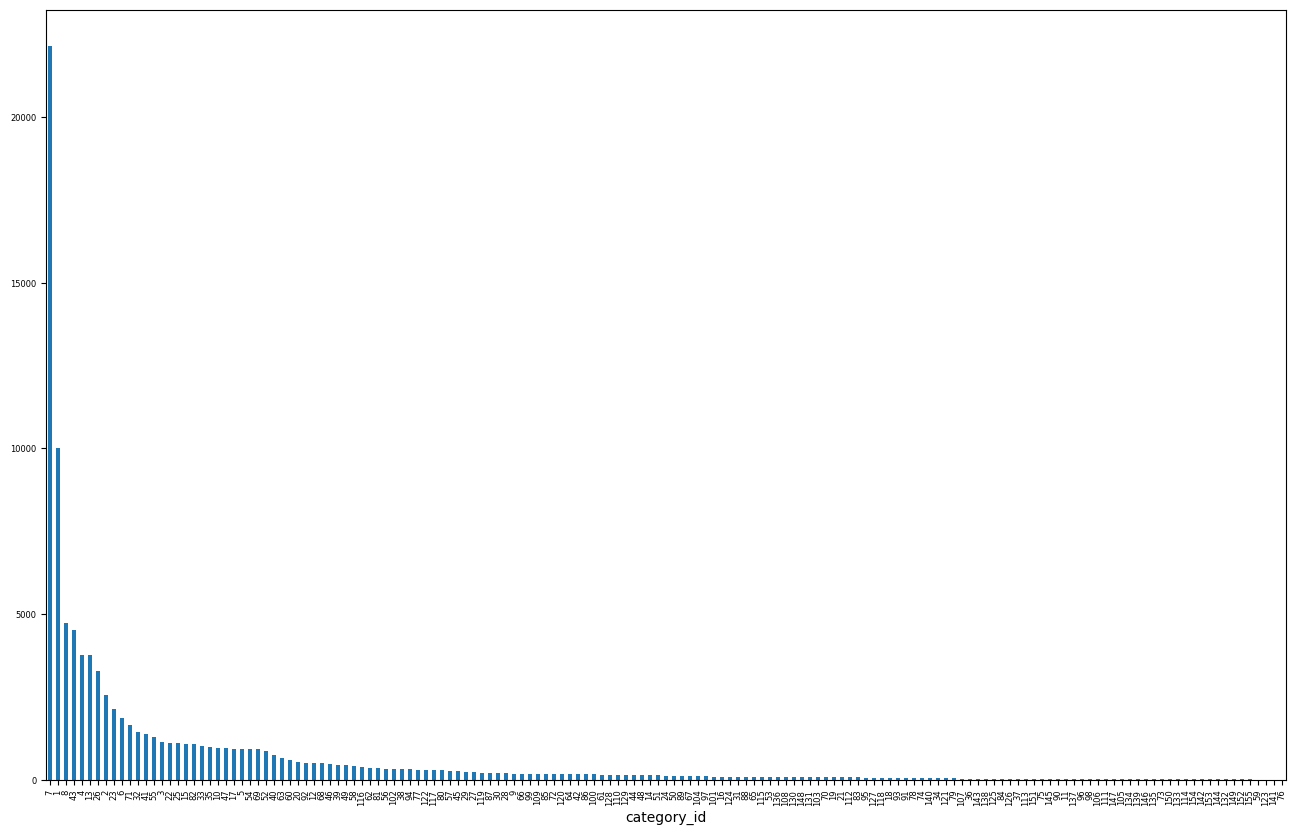

In [30]:
train_annotations["category_id"].value_counts().plot(kind='bar', rot=90, figsize=(16, 10), fontsize=6)


In [48]:
threshold = train_annotations["category_id"].value_counts().sum() * 0.01
threshold
 

954.9200000000001

In [49]:
train_annotations["category_id"].value_counts()[train_annotations["category_id"].value_counts() > threshold]
categories = train_annotations["category_id"].value_counts()[train_annotations["category_id"].value_counts() > threshold].index

In [50]:
print(len(categories))
categories


22


Index([7, 1, 8, 43, 4, 13, 26, 2, 23, 6, 71, 32, 41, 55, 3, 22, 25, 15, 82, 33,
       35, 10],
      dtype='int64', name='category_id')

<Axes: xlabel='category_id'>

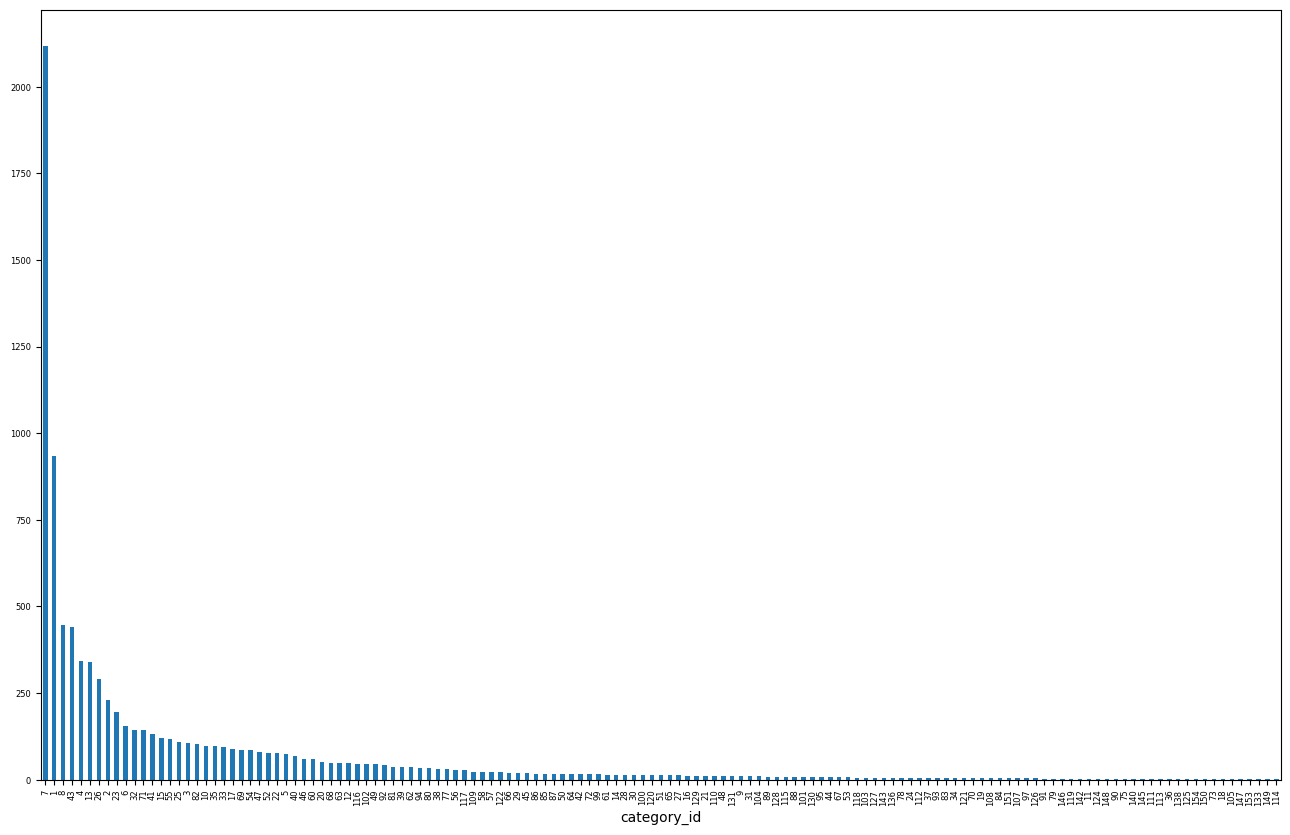

In [34]:
test_annotations["category_id"].value_counts().plot(kind='bar', rot=90, figsize=(16, 10), fontsize=6)

In [35]:
test_categories = test_annotations["category_id"].value_counts().head(len(categories)).index.tolist()

In [36]:
set(categories) == set(test_categories)

False

In [37]:
set(categories).difference(set(test_categories))

{3, 22}

In [38]:
set(test_categories).difference(set(categories))

{15, 25}

In [39]:
(train_annotations["category_id"] == 63).sum()


647

In [40]:
(test_annotations["category_id"] == 63).sum()


47

In [41]:
(train_annotations["category_id"] == 46).sum()


473

In [42]:
(test_annotations["category_id"] == 46).sum()


60